In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

### Données nettes de réassurance pour le calibrage du risque de prime

In [33]:
X_Agr_Sim = [155E3,174E3,189E3,234E3,264E3,291E3]
Y_Agr_Sim = [108E3,121E3,126E3,139E3,181E3,182E3]
Anne_Agr  = [x for x in range(2011,2017)]
dt_Agr_Sim = {"X_t": X_Agr_Sim, "Y_t": Y_Agr_Sim}

In [34]:
df_Agr_Sim = pd.DataFrame(dt_Agr_Sim, index =Anne_Agr)
df_Agr_Sim

,X_t,Y_t
2011,155000.0,108000.0
2012,174000.0,121000.0
2013,189000.0,126000.0
2014,234000.0,139000.0
2015,264000.0,181000.0
2016,291000.0,182000.0


In [35]:
X_Agr_Pon = [20E3,25E3,29E3,35E3,38E3,40E3]
Y_Agr_Pon = [14E3,18E3,19E3,19E3,24E3,22E3]
dt_Agr_Pon = {"X_t": X_Agr_Pon, "Y_t": Y_Agr_Pon}

In [36]:
df_Agr_Pon = pd.DataFrame(dt_Agr_Pon, index =Anne_Agr)
df_Agr_Pon

,X_t,Y_t
2011,20000.0,14000.0
2012,25000.0,18000.0
2013,29000.0,19000.0
2014,35000.0,19000.0
2015,38000.0,24000.0
2016,40000.0,22000.0


## Test 1

In [37]:
import statsmodels.api as sm

In [38]:
X_Agr_Pon = df_Agr_Sim[["X_t"]]
X_Agr_Pon["intercept"] = 1.
Y_Agr_Pon = df_Agr_Sim["Y_t"] 

In [39]:
result_Agr_Sim = sm.OLS(Y_Agr_Pon, X_Agr_Pon).fit() 

In [40]:
print(result_Agr_Sim.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y_t   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     56.70
Date:                Wed, 06 Jul 2022   Prob (F-statistic):            0.00167
Time:                        20:41:49   Log-Likelihood:                -61.965
No. Observations:                   6   AIC:                             127.9
Df Residuals:                       4   BIC:                             127.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X_t            0.5674      0.075      7.530      0.0

G:\Users\nguyen.trinh\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [41]:
# Y = a + bX_t + epsilon_t
b_Agr_Sim = result_Agr_Sim.params['X_t']
a_Agr_Sim = result_Agr_Sim.params['intercept']

In [42]:
b_Agr_Sim

0.5673792411255065

In [43]:
a_Agr_Sim

19239.221974827065

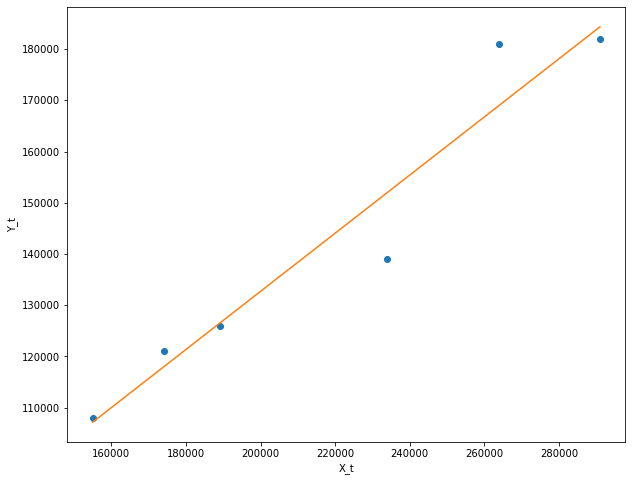

In [44]:
plt.figure(figsize=(10, 8))
plt.plot(df_Agr_Sim["X_t"] , df_Agr_Sim["Y_t"], "o")
x_points  = np.linspace(df_Agr_Sim["X_t"].min(),df_Agr_Sim["X_t"].max(),6)
plt.plot(x_points, [a_Agr_Sim + b_Agr_Sim*x for x in x_points])
plt.xlabel("X_t")
plt.ylabel("Y_t")
plt.show()

In [45]:
X_Agr_Pon = df_Agr_Pon[["X_t"]]
X_Agr_Pon["intercept"] = 1.
Y_Agr_Pon = df_Agr_Pon["Y_t"] 
result_Agr_Pon = sm.OLS(Y_Agr_Pon, X_Agr_Pon).fit() # OLS = Ordinary Least Squares 
print(result_Agr_Pon.summary())

                            OLS Regression Results                            
Dep. Variable:                    Y_t   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     19.06
Date:                Wed, 06 Jul 2022   Prob (F-statistic):             0.0120
Time:                        20:41:50   Log-Likelihood:                -51.579
No. Observations:                   6   AIC:                             107.2
Df Residuals:                       4   BIC:                             106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X_t            0.3998      0.092      4.365      0.0

G:\Users\nguyen.trinh\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [46]:
b_Agr_Pon = result_Agr_Pon.params['X_t']
a_Agr_Pon = result_Agr_Pon.params['intercept']
print("b = {}, a = {}".format(b_Agr_Pon,a_Agr_Pon))
print("p_value:", result_Agr_Pon.pvalues)

b = 0.3997827267789247, a = 6873.438348723513
p_value: X_t          0.012011
intercept    0.078758
dtype: float64


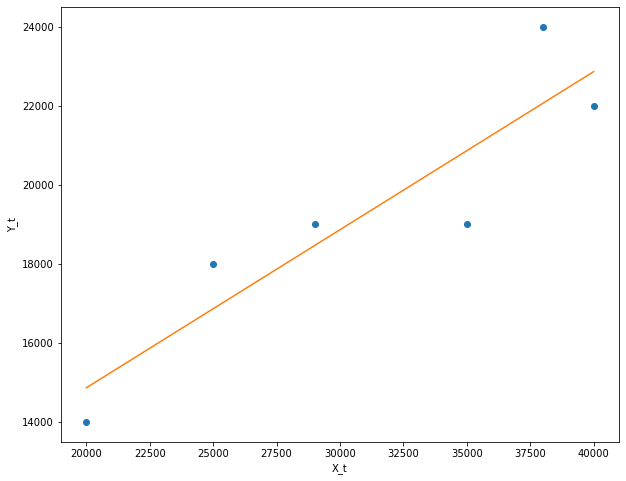

In [47]:
plt.figure(figsize=(10, 8))
plt.plot(df_Agr_Pon["X_t"] , df_Agr_Pon["Y_t"], "o")
x_points  = np.linspace(df_Agr_Pon["X_t"].min(),df_Agr_Pon["X_t"].max(),6)
plt.plot(x_points, [a_Agr_Pon + b_Agr_Pon*x for x in x_points])
plt.xlabel("X_t")
plt.ylabel("Y_t")
plt.show()

## Test 2: the residual follows normal distribution or not?

In [48]:
# residuals of the model "Agrégation simple"
r_Agr_Sim = result_Agr_Sim.resid
r_Agr_Sim

2011      816.995651
2012     3036.790069
2013     -473.898548
2014   -13005.964398
2015    11972.658368
2016    -2346.581142
dtype: float64

In [49]:
fig = px.bar(r_Agr_Sim,  labels={
                     "index": "Year",
                     "value": "Residual",
                                 },)
fig.show()

In [50]:
from scipy.stats import shapiro

In [51]:
stat_Agr_Sim, p_Agr_Sim = shapiro(r_Agr_Sim)
print('stat=%.3f, p_value=%.3f' % (stat_Agr_Sim, p_Agr_Sim))

stat=0.953, p_value=0.767


* Since p_value > 0.05 then residual  follows the normal distribution 

G:\Users\nguyen.trinh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



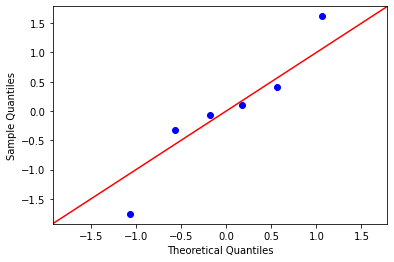

In [52]:
## QQ plot
from scipy.stats import norm
sm.qqplot(r_Agr_Sim,norm,fit=True,line="45")
plt.show()

In [53]:
# residuals of the model "Agrégation pondérée"
r_Agr_Pon = result_Agr_Pon.resid
r_Agr_Pon

2011    -869.092884
2012    1131.993482
2013     532.862575
2014   -1865.833786
2015    1934.818034
2016    -864.747420
dtype: float64

In [54]:
fig = px.bar(r_Agr_Pon,  labels={
                     "index": "Year",
                     "value": "Residual",
                                 },)
fig.show()

In [55]:
stat_Agr_Pon, p_Agr_Pon = shapiro(r_Agr_Pon)
print('stat=%.3f, p_value=%.3f' % (stat_Agr_Pon, p_Agr_Pon))

stat=0.951, p_value=0.749


G:\Users\nguyen.trinh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



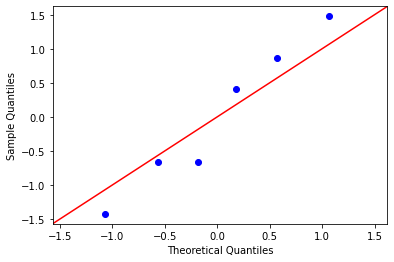

In [56]:
## QQ plot
sm.qqplot(r_Agr_Pon,norm,fit=True,line="45")
plt.show()

## Test 3: the residual follows log-normal distribution or not?

#### Simple data

In [57]:
#Shapiro-Wilk test
from scipy import stats
stat_Agr_Sim, p_Agr_Sim = shapiro(np.log(np.abs(r_Agr_Sim)))
print('stat=%.3f, p_value=%.3f' % (stat_Agr_Sim, p_Agr_Sim))

stat=0.920, p_value=0.506


In [58]:
stats.lognorm.fit(np.abs(r_Agr_Sim))

(5.116920329400142, 473.89854754780515, 1.4775836659898292)

In [59]:
# Kolmogorov-Smirnov test 
stats.kstest(np.abs(r_Agr_Sim), "lognorm", stats.lognorm.fit(np.abs(r_Agr_Sim)))

KstestResult(statistic=0.6898106839795316, pvalue=0.002285617392664372)

#### Pondérée data

In [60]:
stat_Agr_Pon, p_Agr_Pon = shapiro(np.log(np.abs(r_Agr_Pon)))
print('stat=%.3f, p_value=%.3f' % (stat_Agr_Pon, p_Agr_Pon))

stat=0.923, p_value=0.527


In [61]:
# Kolmogorov-Smirnov test 
from scipy import stats
stats.kstest(np.abs(r_Agr_Pon), "lognorm", stats.lognorm.fit(np.abs(r_Agr_Pon)))

KstestResult(statistic=0.6735906934998109, pvalue=0.0032596076647980893)